In [2]:
# Librerias y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



In [3]:
# Carga de datos

# Dataset de Clasificación
df_cls = pd.read_csv("data/wine_data_train_classification.csv")
print(df_cls.head())
print(f"Dataset Clasificación cargado: {df_cls.shape[0]} filas, {df_cls.shape[1]} columnas")

# Dataset de Regresión
df_reg = pd.read_csv("data/wine_data_train_regression.csv")
print(f"Dataset Regresión cargado: {df_reg.shape[0]} filas, {df_reg.shape[1]} columnas")

#información básica de los datasets
info_cls = pd.DataFrame({
    "Tipo de Dato": df_cls.dtypes,
    "Valores Nulos": df_cls.isnull().sum(),
    "Valores Únicos": df_cls.nunique(),
    "Valores No Nulos": df_cls.notnull().sum()
})

display(info_cls.style.background_gradient(cmap='Greens').set_caption("📋 Información General - Dataset Clasificación"))

info_reg = pd.DataFrame({
    "Tipo de Dato": df_reg.dtypes,
    "Valores Nulos": df_reg.isnull().sum(),
    "Valores Únicos": df_reg.nunique(),
    "Valores No Nulos": df_reg.notnull().sum()
})

display(info_reg.style.background_gradient(cmap='Oranges').set_caption("📋 Información General - Dataset Regresión"))




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.4              0.31         0.26            13.2      0.046   
1            6.6              0.29         0.31             3.9      0.027   
2            6.8              0.30         0.23             4.6      0.061   
3            6.6              0.25         0.35            14.0      0.069   
4            7.5              0.24         0.31            13.1      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 57.0                 205.0  0.99750  3.17       0.41   
1                 39.0                  96.0  0.99035  3.24       0.60   
2                 50.5                 238.5  0.99580  3.32       0.60   
3                 42.0                 163.0  0.99900  3.56       0.47   
4                 26.0                 180.0  0.99884  3.05       0.53   

   alcohol   type quality_category  quality_label  
0      9.6  white           Medium

,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,105,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,88,5847
residual sugar,float64,0,307,5847
chlorides,float64,0,207,5847
free sulfur dioxide,float64,0,132,5847
total sulfur dioxide,float64,0,275,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,109,5847


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,104,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,89,5847
residual sugar,float64,0,313,5847
chlorides,float64,0,204,5847
free sulfur dioxide,float64,0,131,5847
total sulfur dioxide,float64,0,271,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,107,5847


In [6]:
print("\n=== NULOS Y DUPLICADOS ===")
nulos_cls = pd.DataFrame({
    "Valores Nulos": df_cls.isnull().sum(),
    "Duplicados": [df_cls.duplicated().sum()] * len(df_cls.columns)
})
display(
    nulos_cls.style
        .background_gradient(cmap='Greens')
        .set_caption("📋 Nulos y Duplicados - Dataset Clasificación")
)

nulos_reg = pd.DataFrame({
    "Valores Nulos": df_reg.isnull().sum(),
    "Duplicados": [df_reg.duplicated().sum()] * len(df_reg.columns)
})
display(
    nulos_reg.style
        .background_gradient(cmap='Oranges')
        .set_caption("📋 Nulos y Duplicados - Dataset Regresión")
)
# df_reg=pd.DataFrame({"Columna": df_reg.columns,"Nulos": df_reg.isnull().sum(),
#     #"fondo": df_reg.isnull().sum().background_gradient(cmap='Oranges')
    
# })
# display(df_reg.isnull().sum().background_gradient(cmap='Oranges').set_caption("📋 Nulos - Dataset Regresión"))
# print("Regresión - Nulos:\n", df_reg.isnull().sum())



print(f"---Duplicados Clasificación: {df_cls.duplicated().sum()}")
print(f"---Duplicados Regresión: {df_reg.duplicated().sum()}")



=== NULOS Y DUPLICADOS ===


,Valores Nulos,Duplicados
fixed acidity,0,970
volatile acidity,0,970
citric acid,0,970
residual sugar,0,970
chlorides,0,970
free sulfur dioxide,0,970
total sulfur dioxide,0,970
density,0,970
pH,0,970
sulphates,0,970


,Valores Nulos,Duplicados
fixed acidity,0,969
volatile acidity,0,969
citric acid,0,969
residual sugar,0,969
chlorides,0,969
free sulfur dioxide,0,969
total sulfur dioxide,0,969
density,0,969
pH,0,969
sulphates,0,969


---Duplicados Clasificación: 970
---Duplicados Regresión: 969



Descripción estadística del dataset de Clasificación:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        7.218616          0.339803     0.318659        5.465401   
std         1.299384          0.164542     0.144632        4.764590   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.056071            30.671969            116.291859     0.994704   
std       0.035622            17.872105             56.506500     0.003

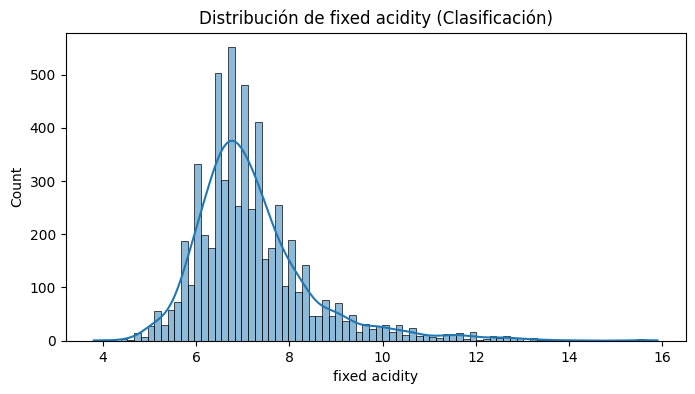

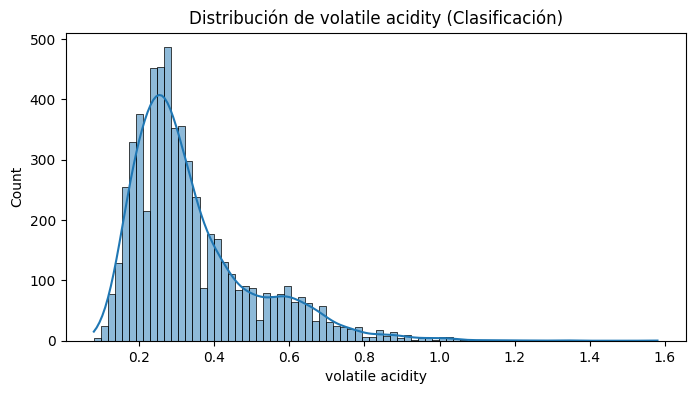

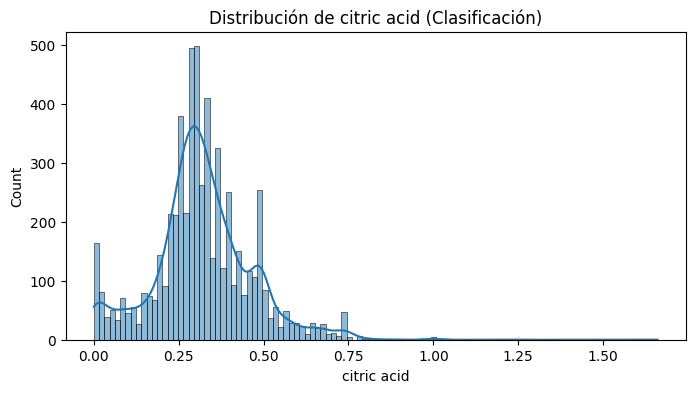

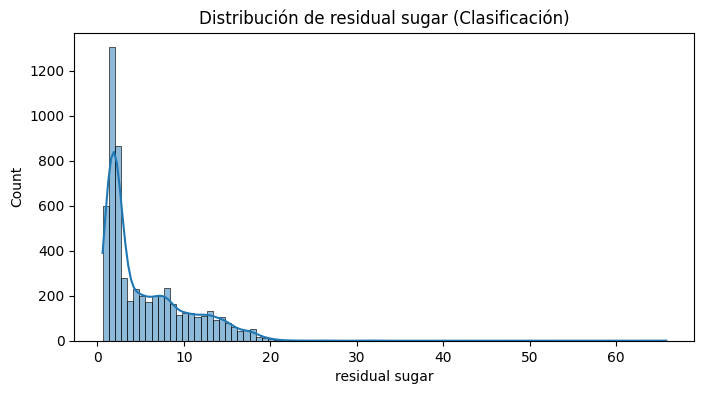

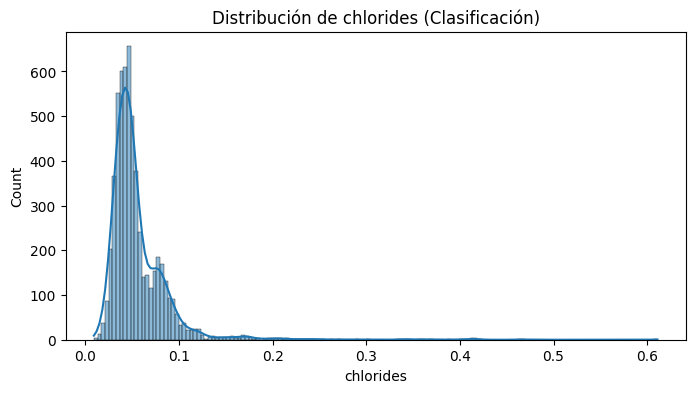

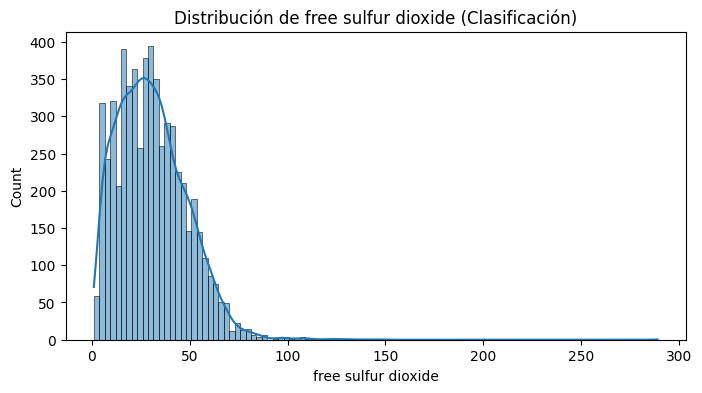

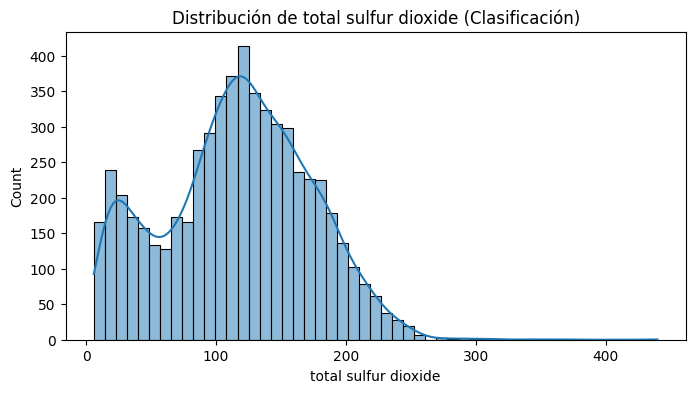

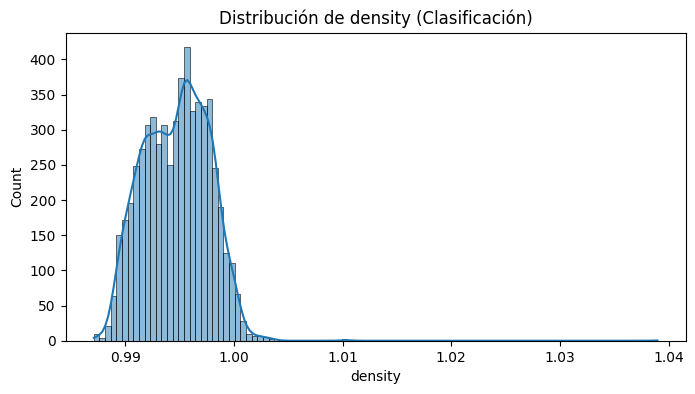

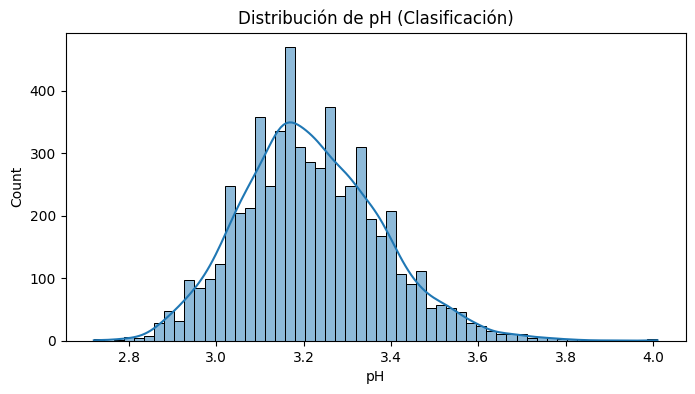

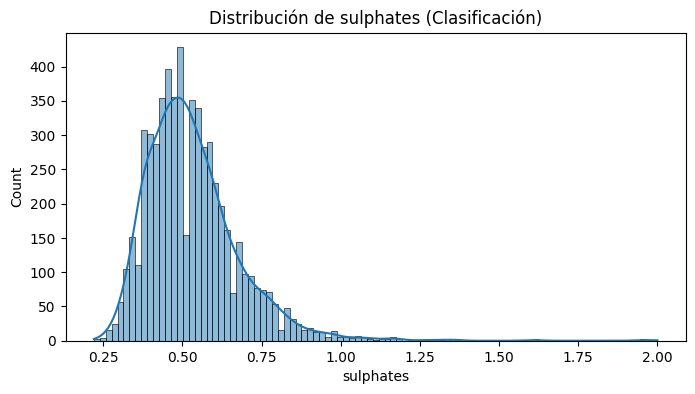

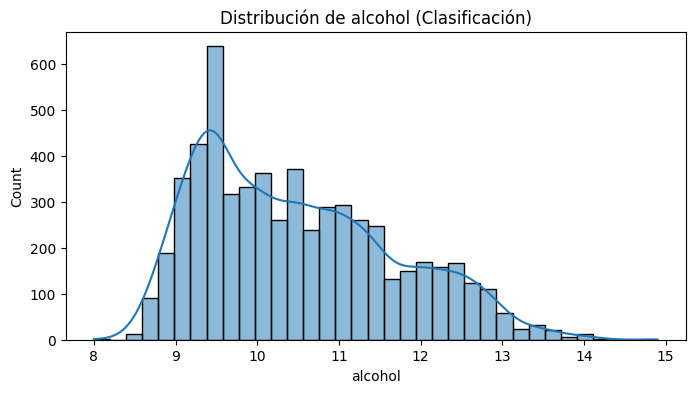

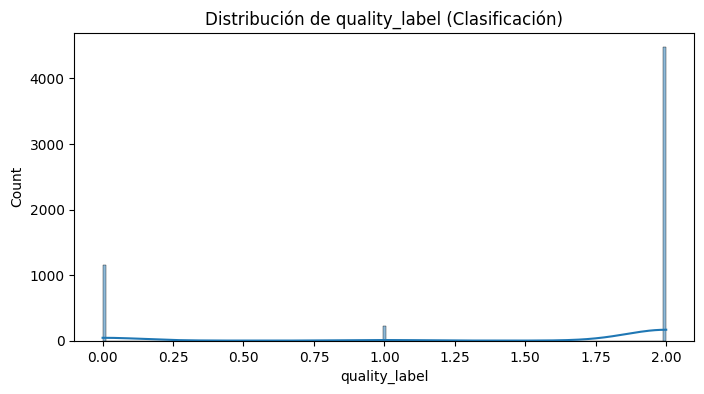

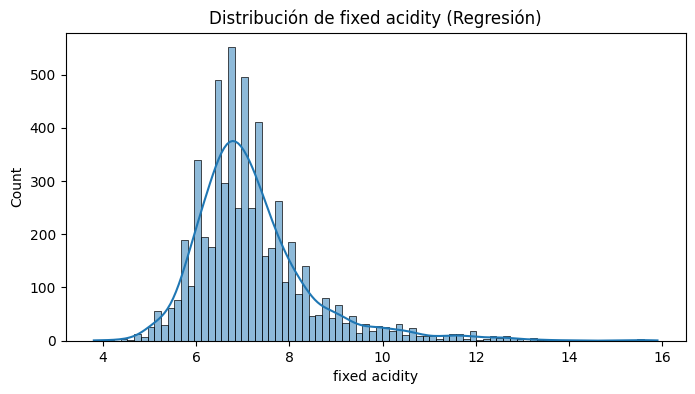

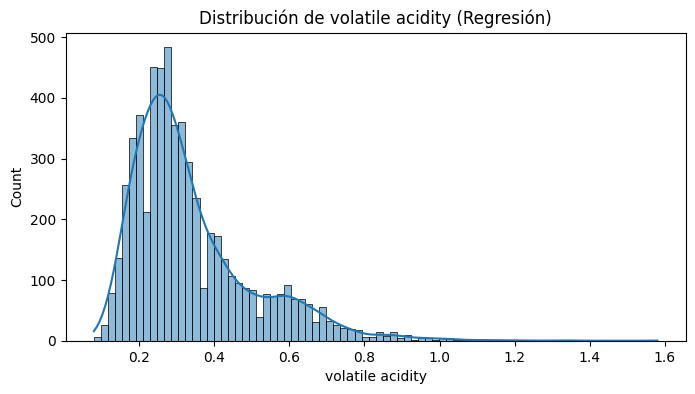

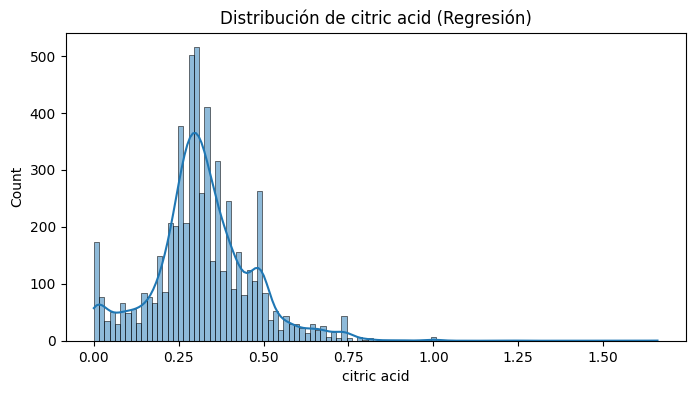

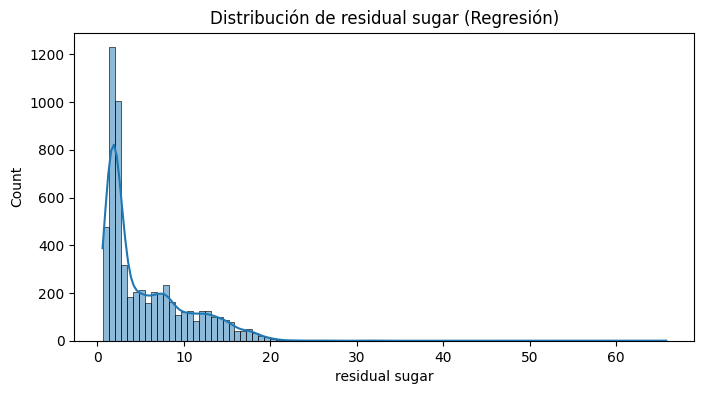

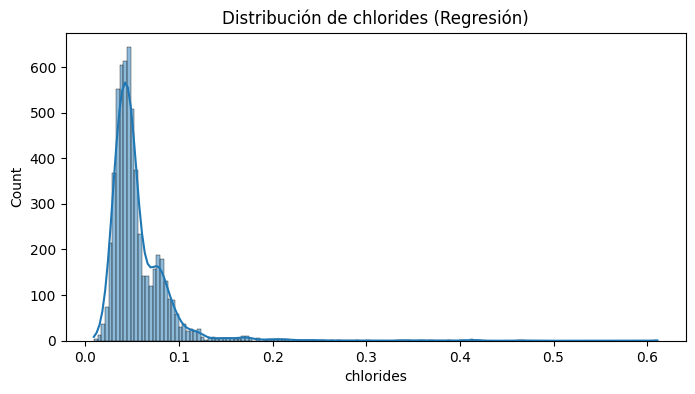

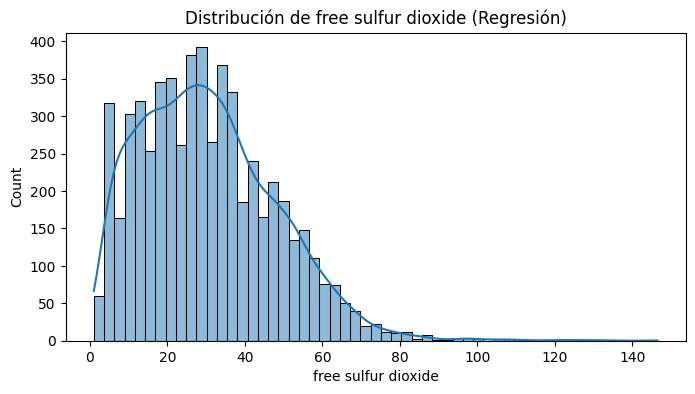

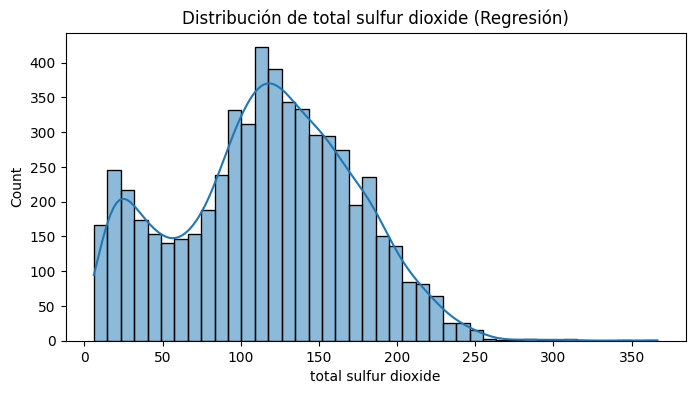

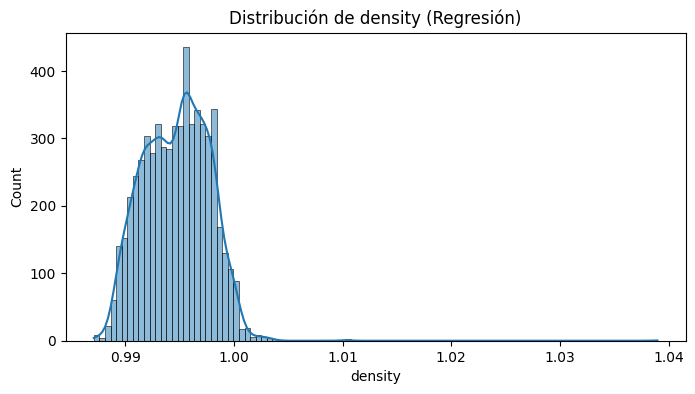

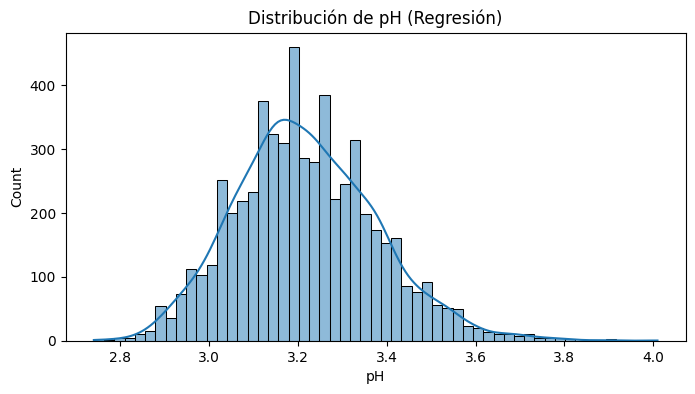

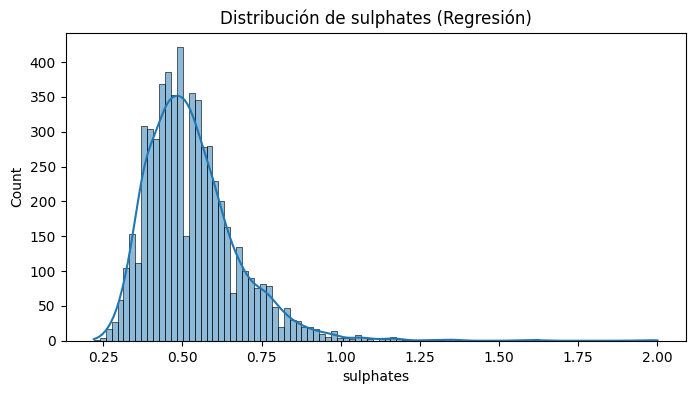

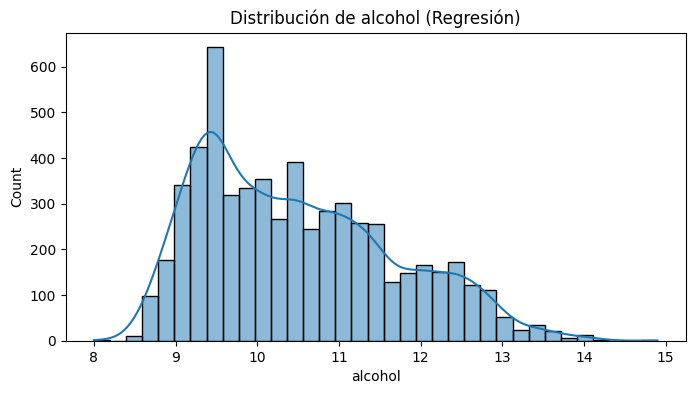

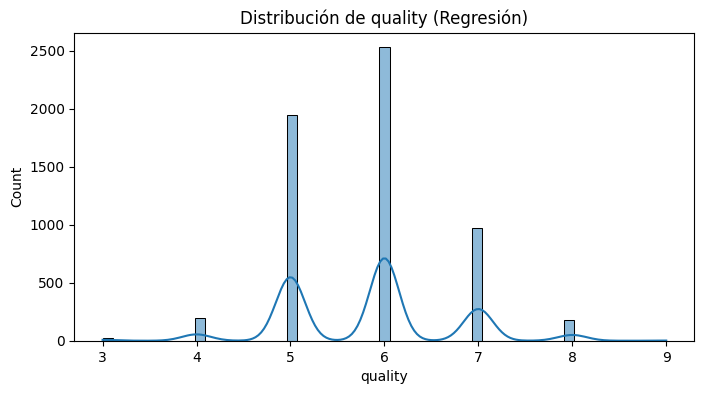

EDA Wines script loaded successfully.


In [7]:

# Análisis estadístico descriptivo
print("\nDescripción estadística del dataset de Clasificación:")
print(df_cls.describe())    

print("\n Descripción estadística del dataset de Regresión:")
print(df_reg.describe())  

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualización de distribuciones de variables numéricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribución de {col} (Clasificación)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribución de {col} (Regresión)')
    plt.show()


# Correlación entre variables
# print("\n=== MATRIZ DE CORRELACIÓN (Clasificación) ===")
# corr_cls = df_cls.corr()
# sns.heatmap(corr_cls, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Matriz de Correlación - Clasificación")
# plt.show()
# print("\n=== MATRIZ DE CORRELACIÓN (Regresión) ===")
# corr_reg = df_reg.corr()
# sns.heatmap(corr_reg, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Matriz de Correlación - Regresión")
# plt.show()

# Preparación de datos para modelado
# Analisis multivariado
# limpieza y transformación de datos
print("EDA Wines script loaded successfully.")


=== OUTLIERS DETECTADOS (Clasificación) ===
fixed acidity: 321

=== OUTLIERS DETECTADOS (Regresión) ===
volatile acidity: 339

=== OUTLIERS DETECTADOS (Regresión) ===
citric acid: 448

=== OUTLIERS DETECTADOS (Regresión) ===
residual sugar: 94

=== OUTLIERS DETECTADOS (Regresión) ===
chlorides: 282

=== OUTLIERS DETECTADOS (Regresión) ===
free sulfur dioxide: 48

=== OUTLIERS DETECTADOS (Regresión) ===
total sulfur dioxide: 12

=== OUTLIERS DETECTADOS (Regresión) ===
density: 3

=== OUTLIERS DETECTADOS (Regresión) ===
pH: 63

=== OUTLIERS DETECTADOS (Regresión) ===
sulphates: 166

=== OUTLIERS DETECTADOS (Regresión) ===
alcohol: 3

=== OUTLIERS DETECTADOS (Regresión) ===
quality_label: 1371

=== OUTLIERS DETECTADOS (Regresión) ===
fixed acidity: 314
volatile acidity: 326
citric acid: 460
residual sugar: 110
chlorides: 259
free sulfur dioxide: 55
total sulfur dioxide: 9
density: 3
pH: 66
sulphates: 167
alcohol: 3
quality: 208


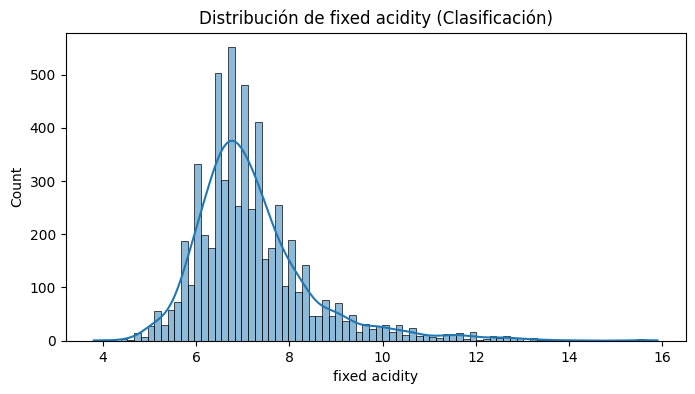

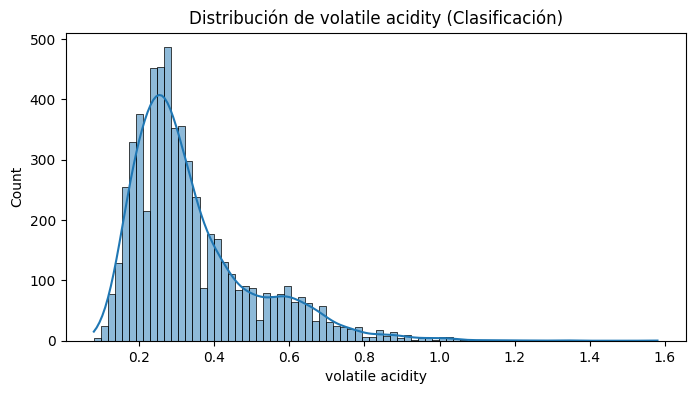

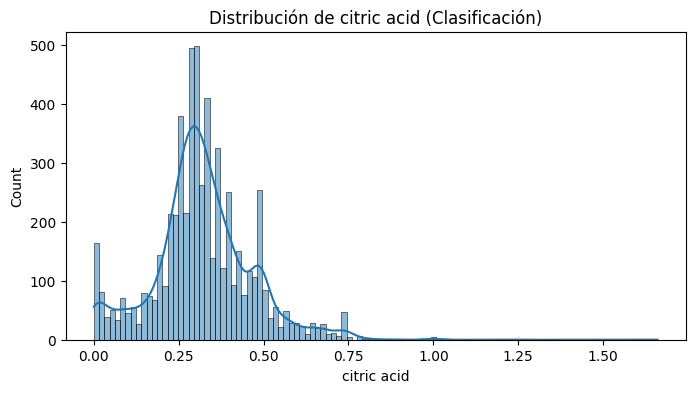

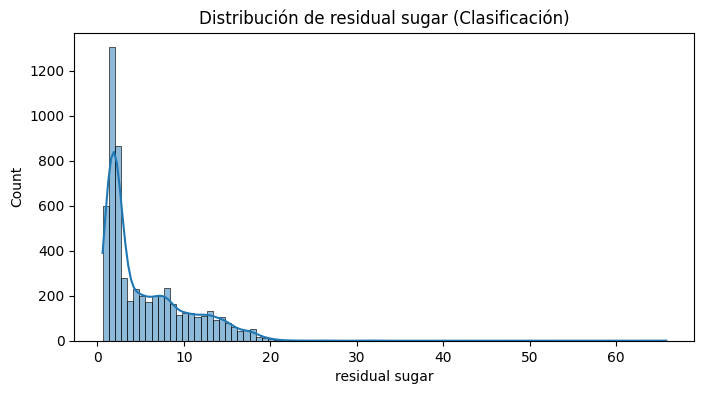

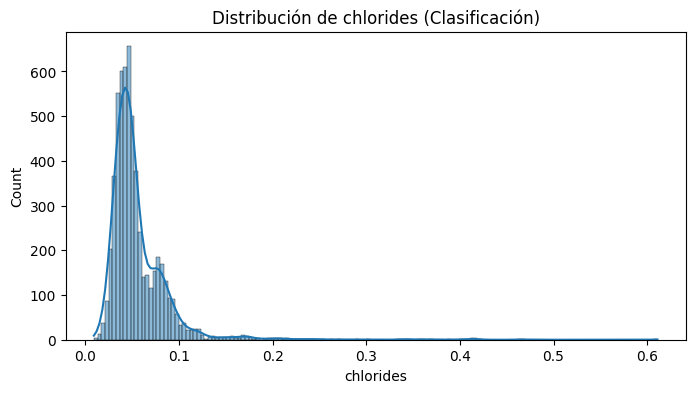

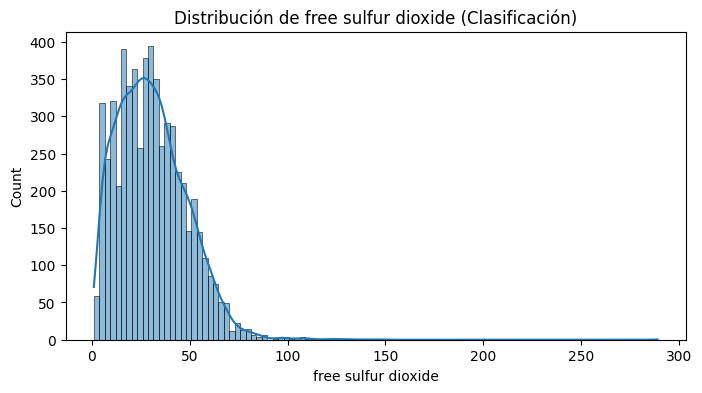

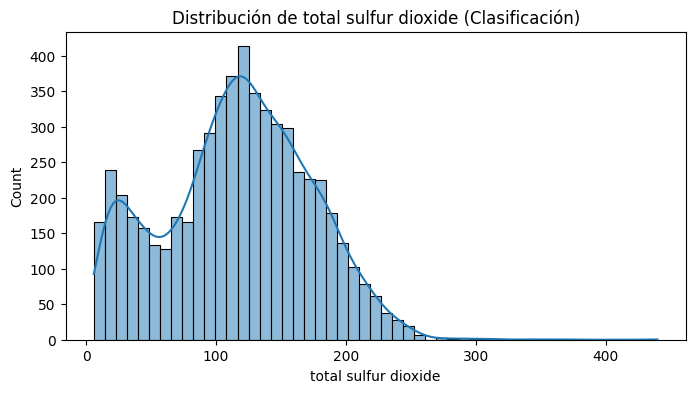

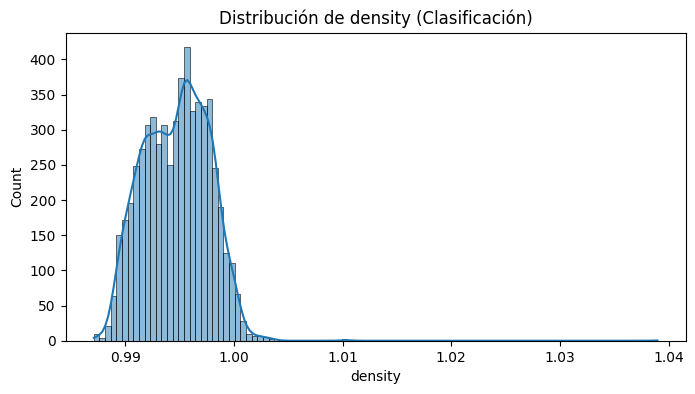

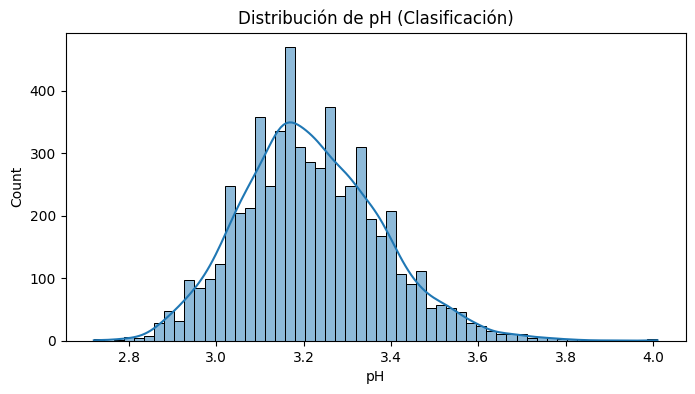

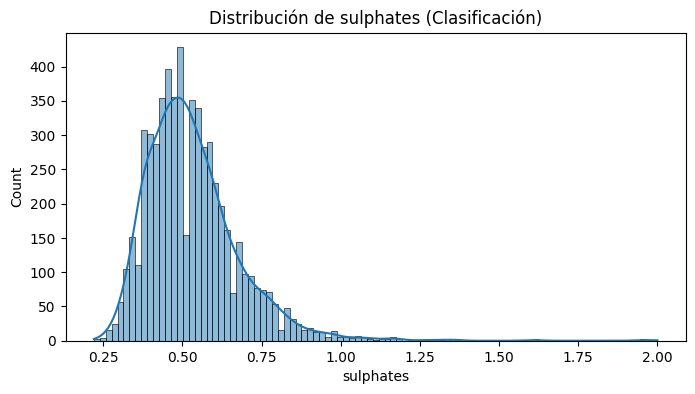

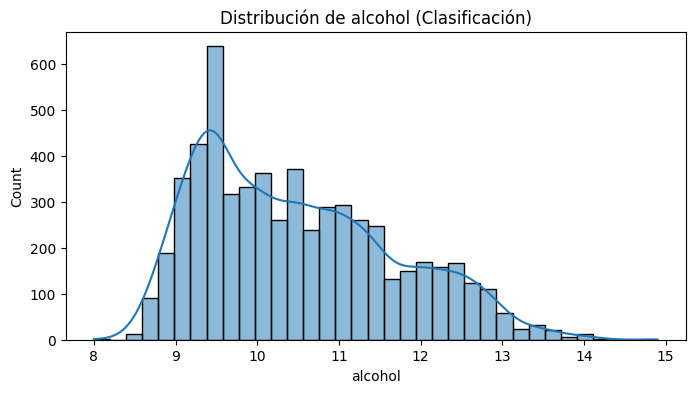

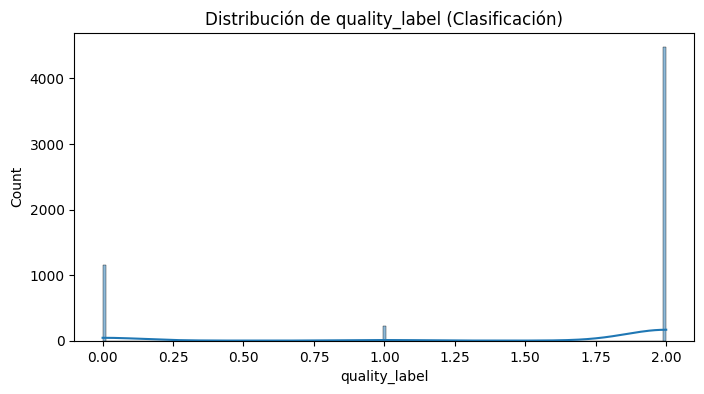

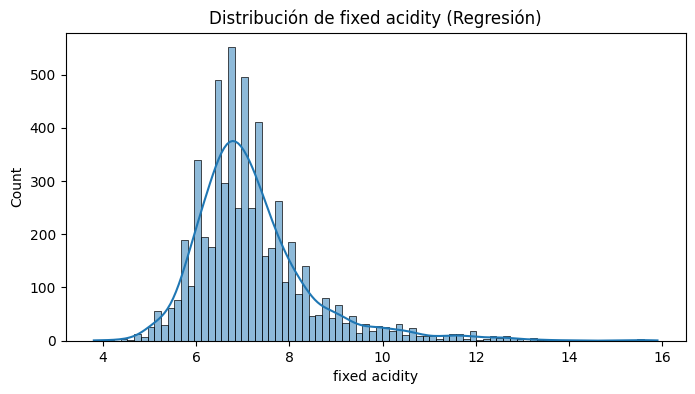

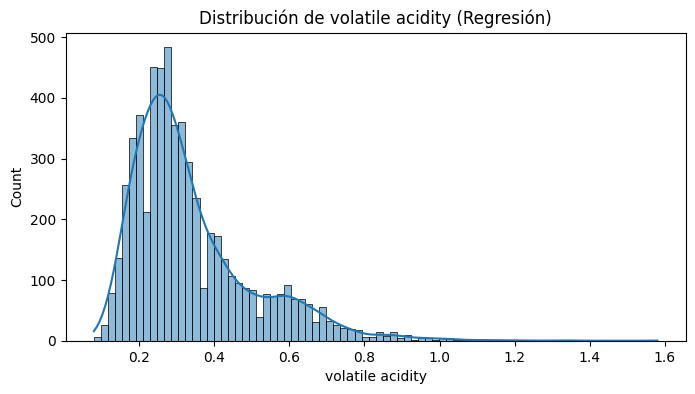

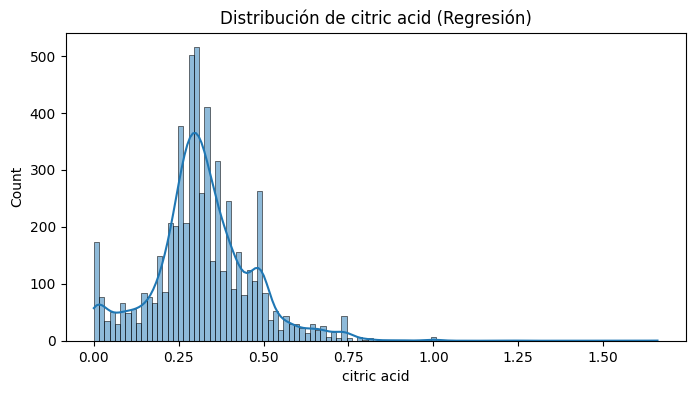

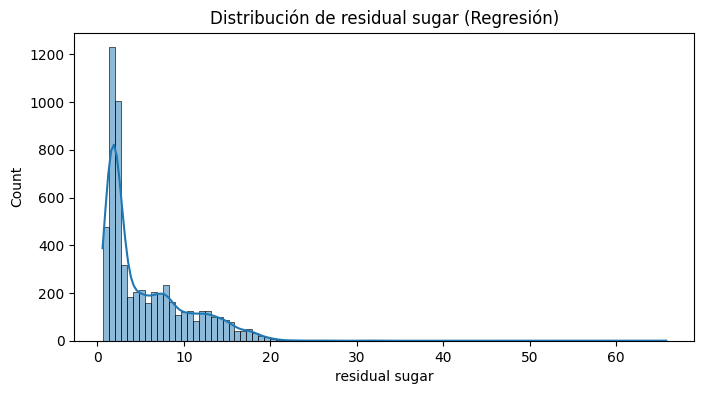

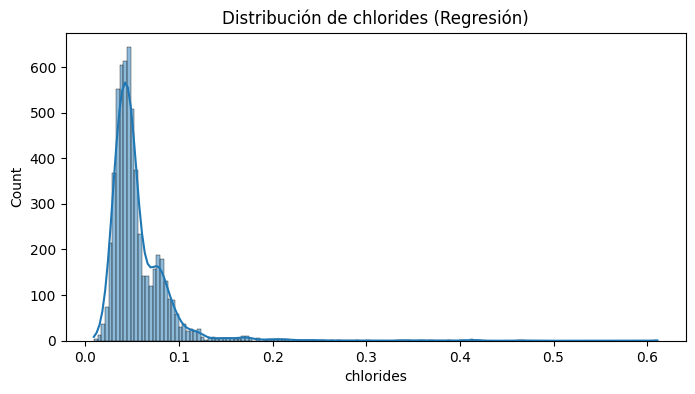

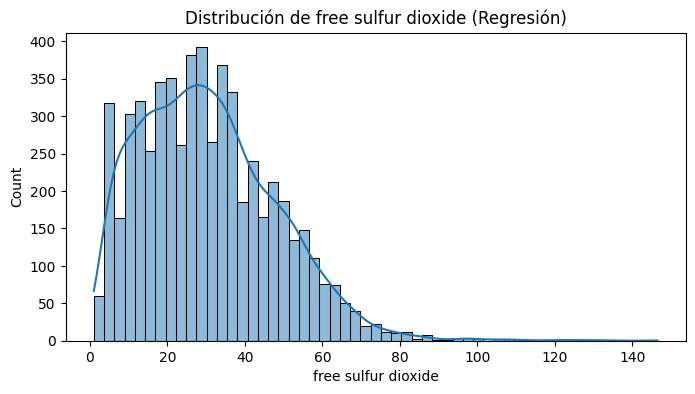

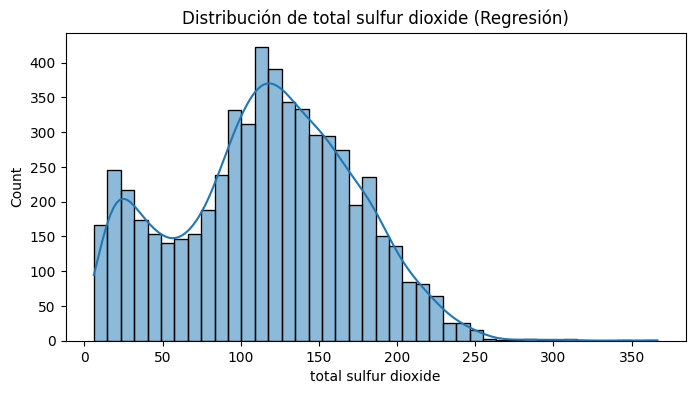

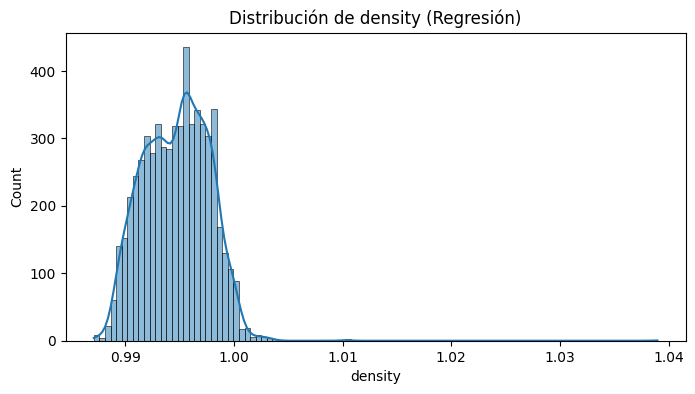

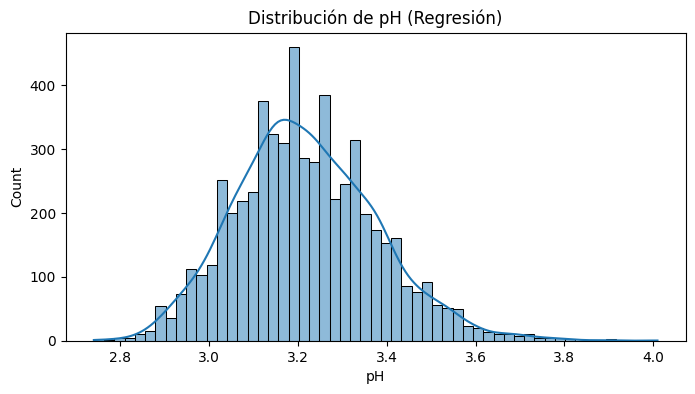

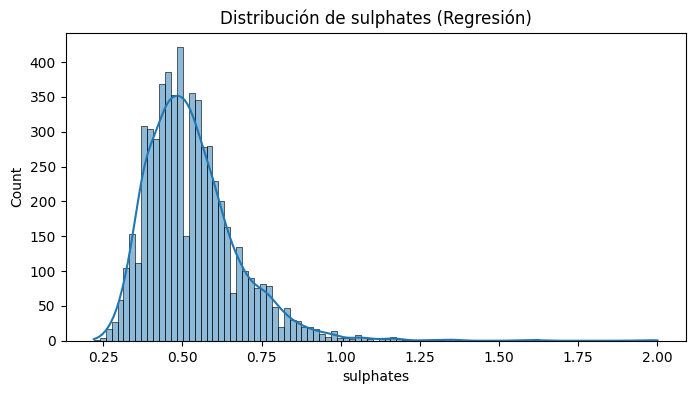

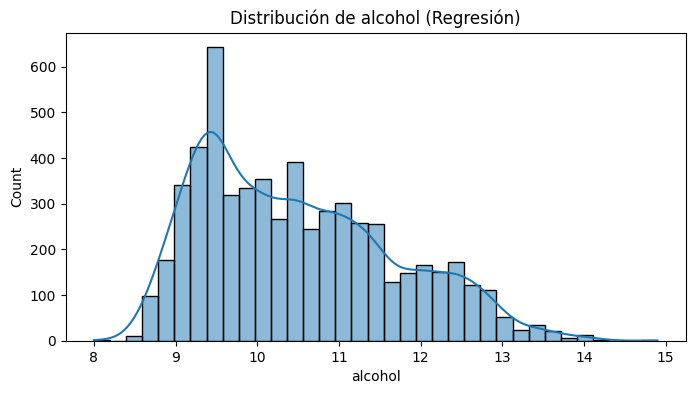

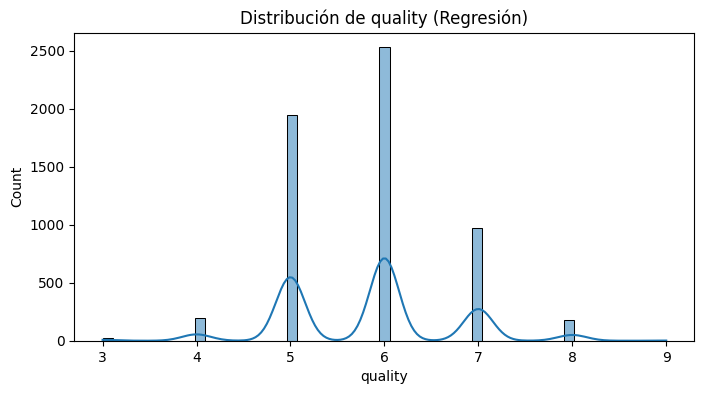

EDA Wines script loaded successfully.


In [8]:

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualización de distribuciones de variables numéricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribución de {col} (Clasificación)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribución de {col} (Regresión)')
    plt.show()


# Correlación entre variables
# print("\n=== MATRIZ DE CORRELACIÓN (Clasificación) ===")
# corr_cls = df_cls.corr()
# sns.heatmap(corr_cls, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Matriz de Correlación - Clasificación")
# plt.show()
# print("\n=== MATRIZ DE CORRELACIÓN (Regresión) ===")
# corr_reg = df_reg.corr()
# sns.heatmap(corr_reg, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Matriz de Correlación - Regresión")
# plt.show()

# Preparación de datos para modelado
# Analisis multivariado
# limpieza y transformación de datos
print("EDA Wines script loaded successfully.")


=== CORRELACION ENTRE VARIABLES ===

=== MATRIZ DE CORRELACIÓN (Clasificación) ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.221922     0.328988   
volatile acidity           0.221922          1.000000    -0.374766   
citric acid                0.328988         -0.374766     1.000000   
residual sugar            -0.112904         -0.191301     0.138369   
chlorides                  0.296657          0.376555     0.046942   
free sulfur dioxide       -0.281741         -0.356843     0.131695   
total sulfur dioxide      -0.325779         -0.415141     0.191276   
density                    0.456728          0.272567     0.101174   
pH                        -0.257963          0.258206    -0.330696   
sulphates                  0.294534          0.226561     0.063811   
alcohol                   -0.095595         -0.039683    -0.013491   
quality_label              0.045741          0.112270    -0.037997   

     

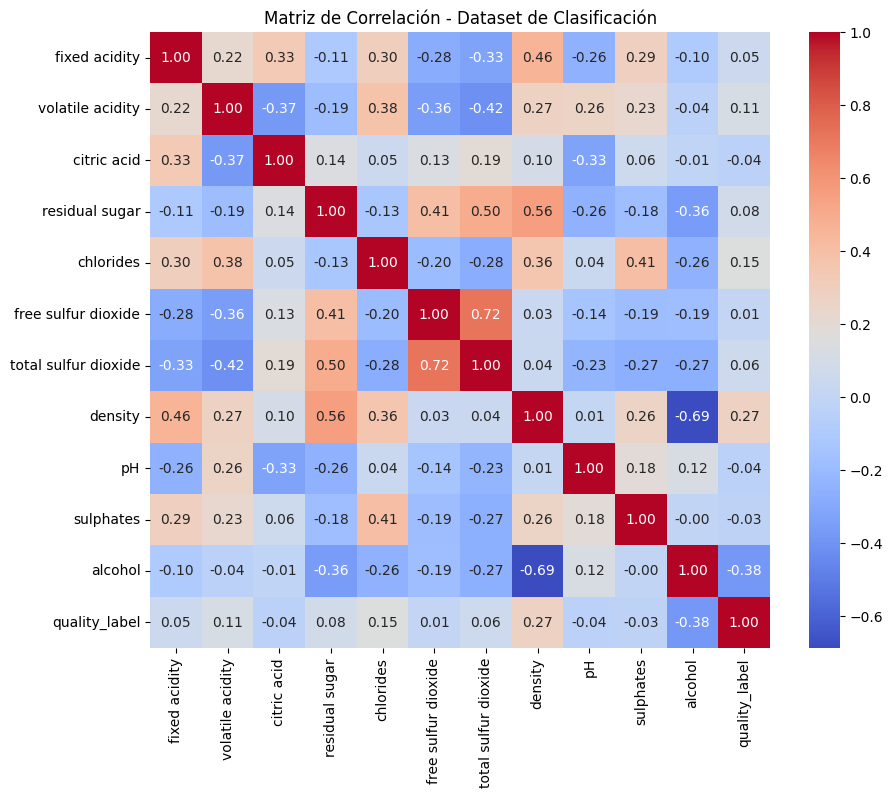

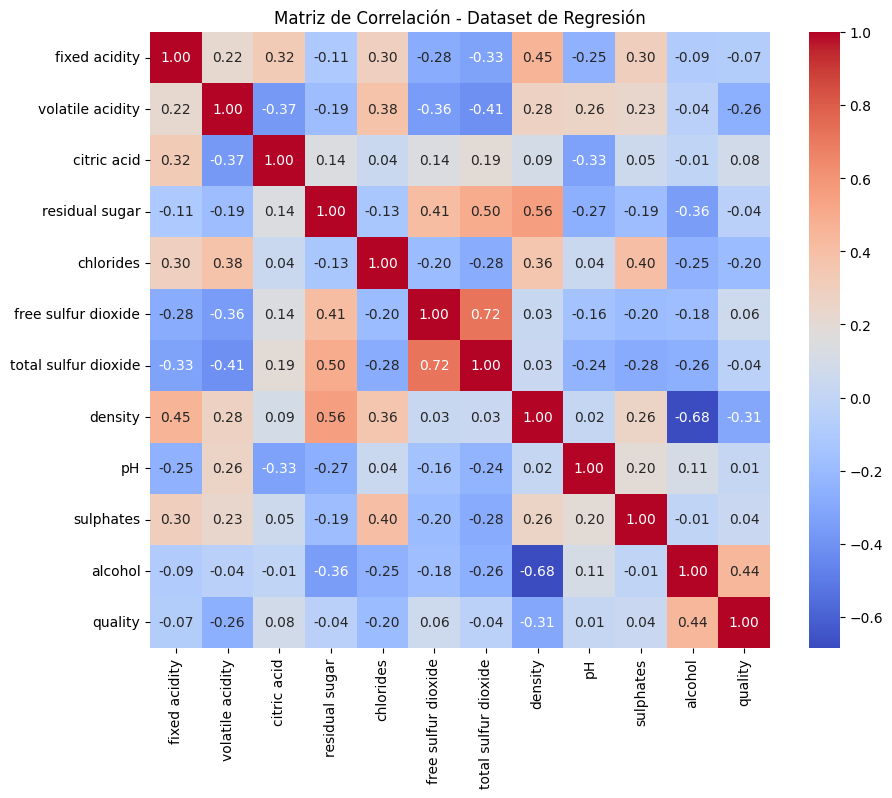


=== CORRELACIONES FUERTES (Clasificación) ===
total sulfur dioxide  free sulfur dioxide     0.722698
free sulfur dioxide   total sulfur dioxide    0.722698
residual sugar        density                 0.556492
density               residual sugar          0.556492
                      alcohol                -0.687549
alcohol               density                -0.687549
dtype: float64

=== CORRELACIONES FUERTES (Regresión) ===
total sulfur dioxide  free sulfur dioxide     0.722499
free sulfur dioxide   total sulfur dioxide    0.722499
residual sugar        density                 0.556590
density               residual sugar          0.556590
                      alcohol                -0.684575
alcohol               density                -0.684575
dtype: float64


In [9]:
print("\n=== CORRELACION ENTRE VARIABLES ===")

print("\n=== MATRIZ DE CORRELACIÓN (Clasificación) ===")
corr_cls = df_cls.corr(numeric_only=True)
print(corr_cls)

print("\n=== MATRIZ DE CORRELACIÓN (Regresión) ===")
corr_reg = df_reg.corr(numeric_only=True)
print(corr_reg)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_cls, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Dataset de Clasificación')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_reg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Dataset de Regresión')
plt.show()

# Identificar correlaciones más fuertes (positivas y negativas)
print("\n=== CORRELACIONES FUERTES (Clasificación) ===")
corr_pairs_cls = corr_cls.unstack().sort_values(ascending=False)
print(corr_pairs_cls[(corr_pairs_cls < 1) & (abs(corr_pairs_cls) > 0.5)])

print("\n=== CORRELACIONES FUERTES (Regresión) ===")
corr_pairs_reg = corr_reg.unstack().sort_values(ascending=False)
print(corr_pairs_reg[(corr_pairs_reg < 1) & (abs(corr_pairs_reg) > 0.5)])


In [10]:
print("\n=== PREPARACIÓN DE DATOS PARA MODELADO ===")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copias de los datasets originales
data_cls = df_cls.copy()
data_reg = df_reg.copy()

# --- 1. Eliminación de duplicados y valores nulos ---
data_cls.drop_duplicates(inplace=True)
data_reg.drop_duplicates(inplace=True)
data_cls.dropna(inplace=True)
data_reg.dropna(inplace=True)

print(f"Dataset Clasificación limpio: {data_cls.shape[0]} filas, {data_cls.shape[1]} columnas")
print(f"Dataset Regresión limpio: {data_reg.shape[0]} filas, {data_reg.shape[1]} columnas")

# --- 2. Separar variables predictoras (X) y objetivo (y) ---
# Ajusta el nombre de la columna objetivo según tu dataset (por ejemplo 'quality' o 'target')
target_cls = 'quality_label'  # <-- cambia si es necesario
target_reg = 'quality'  # <-- cambia si es necesario

X_cls = data_cls.drop(columns=[target_cls])
y_cls = data_cls[target_cls]

X_reg = data_reg.drop(columns=[target_reg])
y_reg = data_reg[target_reg]

# --- 3. Codificación de variables categóricas (si existen) ---
cat_cols_cls = X_cls.select_dtypes(include=['object']).columns
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns

if len(cat_cols_cls) > 0:
    print(f"Codificando variables categóricas (Clasificación): {list(cat_cols_cls)}")
    X_cls = pd.get_dummies(X_cls, columns=cat_cols_cls, drop_first=True)

if len(cat_cols_reg) > 0:
    print(f"Codificando variables categóricas (Regresión): {list(cat_cols_reg)}")
    X_reg = pd.get_dummies(X_reg, columns=cat_cols_reg, drop_first=True)

# --- 4. Escalado de variables numéricas ---
scaler = StandardScaler()

X_cls_scaled = scaler.fit_transform(X_cls)
X_reg_scaled = scaler.fit_transform(X_reg)

print("Variables numéricas escaladas correctamente.")

# --- 5. División en entrenamiento y prueba ---
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.3, random_state=42, stratify=y_cls)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.3, random_state=42)

print("Conjuntos de entrenamiento y prueba creados exitosamente.")
print(f"Clasificación -> Entrenamiento: {X_train_cls.shape}, Prueba: {X_test_cls.shape}")
print(f"Regresión -> Entrenamiento: {X_train_reg.shape}, Prueba: {X_test_reg.shape}")


=== PREPARACIÓN DE DATOS PARA MODELADO ===
Dataset Clasificación limpio: 4877 filas, 14 columnas
Dataset Regresión limpio: 4878 filas, 13 columnas
Codificando variables categóricas (Clasificación): ['type', 'quality_category']
Codificando variables categóricas (Regresión): ['type']
Variables numéricas escaladas correctamente.
Conjuntos de entrenamiento y prueba creados exitosamente.
Clasificación -> Entrenamiento: (3413, 14), Prueba: (1464, 14)
Regresión -> Entrenamiento: (3414, 12), Prueba: (1464, 12)


In [17]:
# ENTRENAMIENTO Y GUARDADO DE MODELOS
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import joblib

# Modelo de Clasificación 
rf_cls = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = rf_cls.predict(X_test_cls)

print("\n--- RESULTADOS MODELO DE CLASIFICACIÓN ---")
print(classification_report(y_test_cls, y_pred_cls))
print("Matriz de Confusión:")
print(confusion_matrix(y_test_cls, y_pred_cls))

# Modelo de Regresión
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

print("\n--- RESULTADOS MODELO DE REGRESIÓN ---")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")


# --- Guardar los modelos entrenados como archivos .pkl ---
joblib.dump(rf_cls, "modelos/modelo_clasificacion_vino.pkl")
joblib.dump(rf_reg, "modelos/modelo_regresion_vino.pkl")

print("\n✅ Modelos entrenados guardados exitosamente:")
print("   - modelo_clasificacion_vino.pkl")
print("   - modelo_regresion_vino.pkl")


--- RESULTADOS MODELO DE CLASIFICACIÓN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00      1121

    accuracy                           1.00      1464
   macro avg       1.00      1.00      1.00      1464
weighted avg       1.00      1.00      1.00      1464

Matriz de Confusión:
[[ 279    0    0]
 [   0   64    0]
 [   0    0 1121]]

--- RESULTADOS MODELO DE REGRESIÓN ---
R² Score: 0.3796
RMSE: 0.6947

✅ Modelos entrenados guardados exitosamente:
   - modelo_clasificacion_vino.pkl
   - modelo_regresion_vino.pkl
